In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.utils.data as utils

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch import optim
import numpy as np

NUM_CLASSES = 10

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(5,5), stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(5,5), stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(5,5), stride=1, padding=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(3*3*64, 50)
        self.fc2 = nn.Linear(50,NUM_CLASSES)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax





In [4]:
x_train = np.load("data/x_train.npy")
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
y_train = np.load("data/y_train.npy")

x_test = np.load("data/x_test.npy")
x_test = (x_test - np.mean(x_test, axis=0))/np.std(x_test, axis=0)
y_test = np.load("data/y_test.npy")

In [5]:
x_train = torch.tensor(x_train, dtype=torch.float64).reshape(-1,1,28,28).float()
y_train = torch.tensor(y_train,dtype=torch.long)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
my_dataset = utils.TensorDataset(x_train,y_train) # create your datset
train_loader = utils.DataLoader(my_dataset,batch_size=50,shuffle=True)

In [8]:
x_test = torch.tensor(x_test, dtype=torch.float64).reshape(-1,1,28,28).float()
y_test = torch.tensor(y_test,dtype=torch.long)

In [9]:
my_test = utils.TensorDataset(x_test,y_test) 
test_loader = utils.DataLoader(my_test,batch_size=50,shuffle=False)

In [10]:
def train_classifier(train_loader, classifier, criterion, optimizer):
    classifier.train()
    loss_ = 0.0
    losses = []
    i=0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        logits = classifier(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss)
    return torch.stack(losses).mean().item()


In [20]:
classifier = Classifier().to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-4)

In [22]:
losses = []

In [23]:
NUM_EPOCHS = 40
for epoch in range(1, NUM_EPOCHS+1):
    print("Starting epoch number " + str(epoch))
    train_loss = train_classifier(train_loader, classifier, criterion, optimizer)
    losses.append(train_loss)
    print("Loss for Training on Epoch " +str(epoch) + " is "+ str(train_loss))

Starting epoch number 1
Loss for Training on Epoch 1 is 0.9617705345153809
Starting epoch number 2
Loss for Training on Epoch 2 is 0.6094292402267456
Starting epoch number 3
Loss for Training on Epoch 3 is 0.5031692981719971
Starting epoch number 4
Loss for Training on Epoch 4 is 0.4357430338859558
Starting epoch number 5
Loss for Training on Epoch 5 is 0.40386763215065
Starting epoch number 6
Loss for Training on Epoch 6 is 0.3768238425254822
Starting epoch number 7
Loss for Training on Epoch 7 is 0.36086505651474
Starting epoch number 8
Loss for Training on Epoch 8 is 0.35158437490463257
Starting epoch number 9
Loss for Training on Epoch 9 is 0.34147921204566956
Starting epoch number 10
Loss for Training on Epoch 10 is 0.3303171992301941
Starting epoch number 11
Loss for Training on Epoch 11 is 0.3203467130661011
Starting epoch number 12
Loss for Training on Epoch 12 is 0.31899455189704895
Starting epoch number 13
Loss for Training on Epoch 13 is 0.31220144033432007
Starting epoch nu

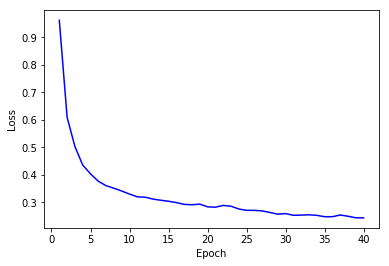

In [29]:
epoch_count = range(1, len(losses) + 1)
plt.plot(epoch_count, losses, 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [30]:
classifier.eval()
class_rate_per_class = [0.0] * 10
yy = np.zeros(10)
result = np.zeros(len(y_test))
y_true = np.zeros(len(y_test))
with torch.no_grad():
    right = 0
    to = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        logits = classifier(images)
        _, predicted = torch.max(logits.data, 1)
        for i in range(predicted.size(0)):
            result[i+to] = predicted[i] 
            y_true[i+to] = labels[i]
            if int(predicted[i]) == int(labels[i]):
                class_rate_per_class[int(labels[i])] += 1
                right += 1
            yy[int(labels[i])] += 1
        to += labels.size(0)
    avg_class_rate = right*1.0/to
    class_rate_per_class = class_rate_per_class/yy

In [31]:
avg_class_rate

0.8924

In [32]:
class_rate_per_class

array([0.845, 0.988, 0.842, 0.892, 0.853, 0.955, 0.665, 0.972, 0.977,
       0.935])

Normalized confusion matrix
[[0.845 0.    0.023 0.025 0.003 0.    0.098 0.    0.006 0.   ]
 [0.    0.988 0.    0.01  0.    0.001 0.    0.    0.001 0.   ]
 [0.01  0.001 0.842 0.011 0.075 0.001 0.055 0.    0.005 0.   ]
 [0.013 0.028 0.008 0.892 0.035 0.    0.022 0.001 0.001 0.   ]
 [0.001 0.002 0.059 0.033 0.853 0.    0.048 0.    0.004 0.   ]
 [0.    0.    0.    0.    0.    0.955 0.001 0.029 0.002 0.013]
 [0.127 0.002 0.074 0.033 0.091 0.    0.665 0.    0.008 0.   ]
 [0.    0.    0.    0.    0.    0.011 0.    0.972 0.002 0.015]
 [0.002 0.004 0.    0.001 0.006 0.002 0.007 0.001 0.977 0.   ]
 [0.    0.    0.    0.    0.    0.005 0.    0.059 0.001 0.935]]


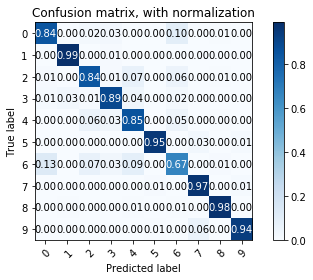

In [33]:
plot_confusion_matrix(y_true.astype(int), result.astype(int), classes=np.array([i for i in range(11)]), normalize=True,
                title='Confusion matrix, with normalization')
plt.savefig('confusion.png')